In [4]:
from osgeo import gdal
import numpy as np
import cv2
path_mask = "F:/Pedro/Facul/TCC/Dataset/ITC_CLASS.tif"
path_img = "F:/Pedro/Facul/TCC/Dataset/RGBNIR_CHM.tif"

im0 = gdal.Open(path_mask).ReadAsArray()
print(im0.shape)

im1 = gdal.Open(path_img).ReadAsArray()
print(im1.shape)

(9458, 10090)
(5, 9458, 10090)


In [5]:
import os
dataset_names = ["dataset_3ch","dataset_8ch","dataset_3ch_small"]
for dataset_name in dataset_names:
    os.makedirs(f"datasets/{dataset_name}/labels/val/",exist_ok=True)
    os.makedirs(f"datasets/{dataset_name}/images/val/",exist_ok=True)
    os.makedirs(f"datasets/{dataset_name}/labels/test/",exist_ok=True)
    os.makedirs(f"datasets/{dataset_name}/images/test/",exist_ok=True)
    os.makedirs(f"datasets/{dataset_name}/labels/train/",exist_ok=True)
    os.makedirs(f"datasets/{dataset_name}/images/train/",exist_ok=True)

In [6]:

print(im0.dtype)
print(np.unique(im0))
values = (np.unique(im0))
print(values[1])

new = np.zeros((im0.shape[0], im0.shape[1]), dtype=np.float32)

for i in range(len(values)):
    value = values[i]
    new[im0 == value] = i+1 


#cv2.imwrite("F:/Pedro/Facul/TCC/Dataset/ITC_CLASS_NORM.tif",new)

uint8
[ 0  2  8 10 11 15 17 21 23 27]
2


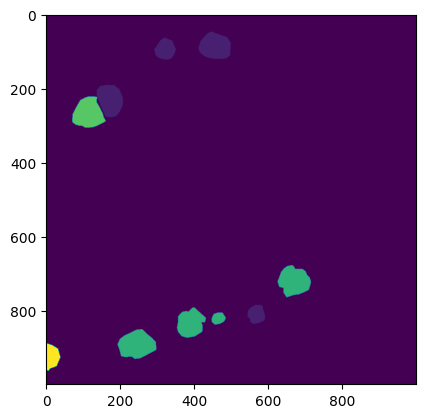

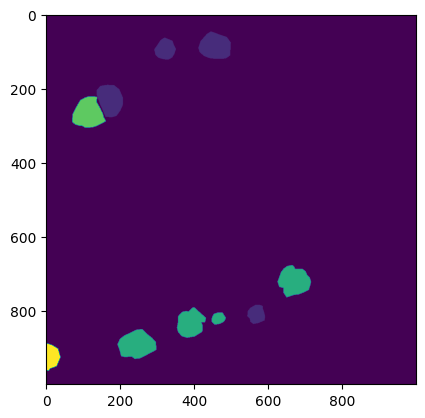

In [7]:
import matplotlib.pyplot as plt
im0
plt.figure()
plt.imshow(im0[1000:2000,1000:2000])
plt.figure()
plt.imshow(new[1000:2000,1000:2000])

In [8]:
from skimage import measure
copied = np.copy(im0[1000:10000,0000:8500])
countours =  measure.find_contours(copied, level = 1)
print(copied.shape)
label_text = ""
#with open(f"datasets/{dataset_name}/labels/{target_folder}/{img_id[:-3]}txt", "w") as my_file:
for countour in countours:
    break
    label_text = label_text + "0 "
    for point in countour:
        x = point[0]/copied.shape[0]
        y = point[1]/copied.shape[1]
        label_text = label_text + str(y) +" "
        label_text = label_text + str(x) +" "
    label_text = label_text[:-1]+ "\n"
    
#breaker essa porra pra n gastar tempo, e nem precisa mais pra frente
#print(label_text)

(8458, 8500)


(8458, 8500, 3)


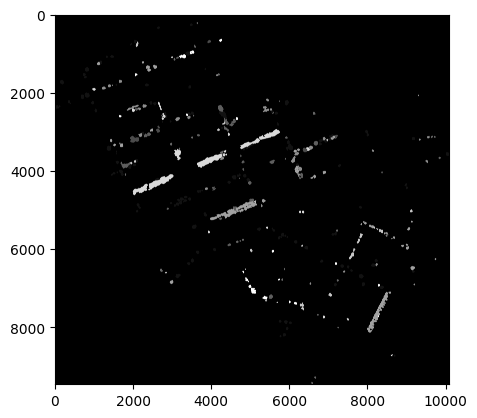

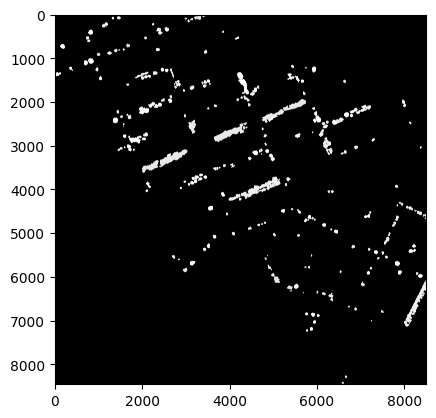

In [9]:
#line = label_text.split("\n")[0]  
copied_3ch = cv2.cvtColor(copied,cv2.COLOR_GRAY2RGB)*255
for line in label_text.split("\n"):
    polygons = line.strip().split()[1:]
    polygon_point_count = len(polygons)
    polygon_point_list = []
    for i in range(int(polygon_point_count/2)):
        x = float(polygons[(i*2)])*copied_3ch.shape[0]
        y = float(polygons[(i*2)+1])*copied_3ch.shape[1]
        #print(f"[x = {x},",end = "")
        #print(f"y = {y}]", end = ",")        
        polygon_point_list.append((x,y))
    #print("")
    #print(polygon_point_list)
    polygon_point_list = np.array(polygon_point_list).reshape((-1,1,2)).astype(np.int32)
    copied_3ch = cv2.drawContours(copied_3ch, polygon_point_list, -1, (255, 0, 0), thickness=15)
print(copied_3ch.shape)
    

plt.figure()
plt.imshow(im0,cmap="gray")
plt.figure()
plt.imshow(copied_3ch)

In [10]:
def cropper(max, total_size, overlap, x=0):
    step = total_size*(1-overlap)

    print(f"\nMax = {max}")
    print(f"overlap = {overlap}")
    print(f"total_size = {total_size}\n")
    print(f"step = {step}\n")
    step_count = 0
    result_list = []
    while x + total_size < max: 
        start = x
        end = x + total_size

        print(f"{x} ate {x + total_size}")

        result_list.append((start,end))
        x += step
        step_count += 1

    start = max - total_size
    end = max-1
    result_list.append((start,end))

    print(f"Seria {x} ate {x+total_size}")
    print(f"{start} ate {end}")
    print(f"step_count = {step_count}")

    return result_list


In [11]:
x=0
max = 1500
total_size = 448
overlap = 0.25
step = total_size*(1-overlap)

list_x_values = cropper(im0.shape[0], total_size, overlap, x=0)
list_y_values = cropper(im0.shape[1], total_size, overlap, x=0)
print(list_x_values)


Max = 9458
overlap = 0.25
total_size = 448

step = 336.0

0 ate 448
336.0 ate 784.0
672.0 ate 1120.0
1008.0 ate 1456.0
1344.0 ate 1792.0
1680.0 ate 2128.0
2016.0 ate 2464.0
2352.0 ate 2800.0
2688.0 ate 3136.0
3024.0 ate 3472.0
3360.0 ate 3808.0
3696.0 ate 4144.0
4032.0 ate 4480.0
4368.0 ate 4816.0
4704.0 ate 5152.0
5040.0 ate 5488.0
5376.0 ate 5824.0
5712.0 ate 6160.0
6048.0 ate 6496.0
6384.0 ate 6832.0
6720.0 ate 7168.0
7056.0 ate 7504.0
7392.0 ate 7840.0
7728.0 ate 8176.0
8064.0 ate 8512.0
8400.0 ate 8848.0
8736.0 ate 9184.0
Seria 9072.0 ate 9520.0
9010 ate 9457
step_count = 27

Max = 10090
overlap = 0.25
total_size = 448

step = 336.0

0 ate 448
336.0 ate 784.0
672.0 ate 1120.0
1008.0 ate 1456.0
1344.0 ate 1792.0
1680.0 ate 2128.0
2016.0 ate 2464.0
2352.0 ate 2800.0
2688.0 ate 3136.0
3024.0 ate 3472.0
3360.0 ate 3808.0
3696.0 ate 4144.0
4032.0 ate 4480.0
4368.0 ate 4816.0
4704.0 ate 5152.0
5040.0 ate 5488.0
5376.0 ate 5824.0
5712.0 ate 6160.0
6048.0 ate 6496.0
6384.0 ate 6832.0
672

(9458, 10090)
min_x = 0
min_y = 0
max_x = -1
max_y = -1

Number of tree type 1: 118
Total number of detected trees: 118
bounding_boxes = (238, 0, 8757, 10090)

Number of tree type 2: 8
Total number of detected trees: 126
bounding_boxes = (663, 1914, 4083, 8383)

Number of tree type 3: 28
Total number of detected trees: 154
bounding_boxes = (786, 1669, 7283, 6724)

Number of tree type 4: 30
Total number of detected trees: 184
bounding_boxes = (208, 1628, 9458, 9854)

Number of tree type 5: 33
Total number of detected trees: 217
bounding_boxes = (0, 1193, 6936, 9581)

Number of tree type 6: 38
Total number of detected trees: 255
bounding_boxes = (1205, 1071, 8147, 9743)

Number of tree type 7: 22
Total number of detected trees: 277
bounding_boxes = (705, 1920, 7835, 9136)

Number of tree type 8: 24
Total number of detected trees: 301
bounding_boxes = (1889, 953, 7780, 6905)

Number of tree type 9: 24
Total number of detected trees: 325
bounding_boxes = (634, 1627, 8745, 8631)

sum = 325


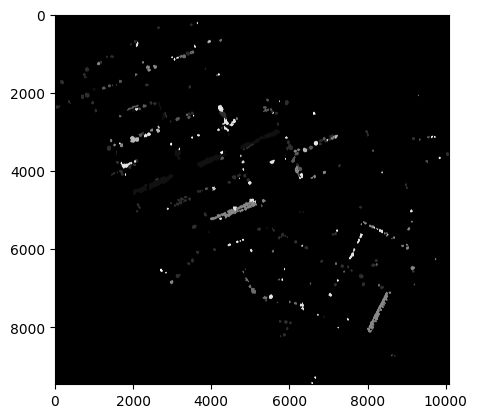

In [12]:
from osgeo import gdal
import numpy as np
import skimage
import cv2

path_mask = "F:/Pedro/Facul/TCC/Dataset/ITC_CLASS.tif"
path_img = "F:/Pedro/Facul/TCC/Dataset/RGBNIR_CHM.tif"

mask_label = gdal.Open(path_mask).ReadAsArray()
print(mask_label.shape)

img_db = gdal.Open(path_img).ReadAsArray()
#print(img_db.shape)
#
# color_list = [(255, 0, 0),(0, 255, 0),(255,255, 0),(0, 0, 255),(255, 0, 255),(0,255, 255),(255,255, 255),(255,192,203)]

output = np.copy(mask_label)

values = (np.unique(output))
#print(values[1])
#print(output.shape)

img_hor_count = 0
img_ver_count = 0

#for i in range(len(values)):
#    value = values[i]
#    new[im0 == value] = i+1 
regions = skimage.measure.regionprops(mask_label.astype(int))
sum = 0
bb_list = []
#new = np.zeros((output.shape[0], output.shape[1]), dtype=np.uint8)
for x_value in list_x_values:
    for y_value in list_y_values:
        min_y = round(x_value[0])
        min_x = round(y_value[0])
        max_y = round(x_value[1])
        max_x = round(y_value[1])
        min_y = 0
        min_x = 0
        max_y = -1
        max_x = -1

        print(f"min_x = {min_x}")
        print(f"min_y = {min_y}")
        print(f"max_x = {max_x}")
        print(f"max_y = {max_y}\n")

        anything = mask_label[min_y:max_y,min_x:max_x]
        if anything is None:
            print("ERROR")

        #print(anything.shape)
        

        copied_3ch = cv2.cvtColor(anything,cv2.COLOR_GRAY2RGB)*23

        label = 0
        #with open(f'F:/Pedro/YOLOv8/My_Code/datasets/full/labels/{img_hor_count}_{img_ver_count}.txt', 'w') as f:
        for tree_class in regions:
            label += 1
            mask_class = tree_class.image[min_y:max_y,min_x:max_x]
            bounding_boxes = tree_class.bbox
            labels = skimage.measure.label(mask_class,background=0)
            tree_count = labels.max()
            sum += tree_count
            print(f"Number of tree type {label}: {labels.max()}")
            if labels.max() > 0:
                print(f"Total number of detected trees: {sum}")
                print(f"bounding_boxes = {bounding_boxes}\n")
            
            for id in range(tree_count):
                test = np.where(labels == id+1)
                x_values = test[0]
                y_values = test[1]

                tree_class = label
                y_min = y_values.min()+bounding_boxes[1]
                x_min = x_values.min()+bounding_boxes[0]
                y_max = y_values.max()+bounding_boxes[1]
                x_max = x_values.max()+bounding_boxes[0]
                bb_list.append([x_min,y_min,x_max,y_max,tree_class])
                #copied_3ch = cv2.rectangle(copied_3ch,(y_values.min()+bounding_boxes[1],x_values.min()+bounding_boxes[0]),(y_values.max()+bounding_boxes[1],x_values.max()+bounding_boxes[0]),(0,0,255),15)
                #copied_3ch = cv2.rectangle(copied_3ch,(bounding_boxes[1],bounding_boxes[0]),(bounding_boxes[3],bounding_boxes[2]),(255,0,0),15)
                #f.write(f"{label},{x_values.min()+bounding_boxes[0]},{x_values.max()+bounding_boxes[0]},{y_values.min()+bounding_boxes[1]},{y_values.max()+bounding_boxes[1]}\n")
                #print(f"{id+1},{x_values.min()},{x_values.max()},{y_values.min()},{y_values.max()}\n")
        print(f"sum = {sum}")
        break
        img_hor_count += 1
        
    img_ver_count += 1
    break

plt.figure()
plt.imshow(copied_3ch,cmap='gray')

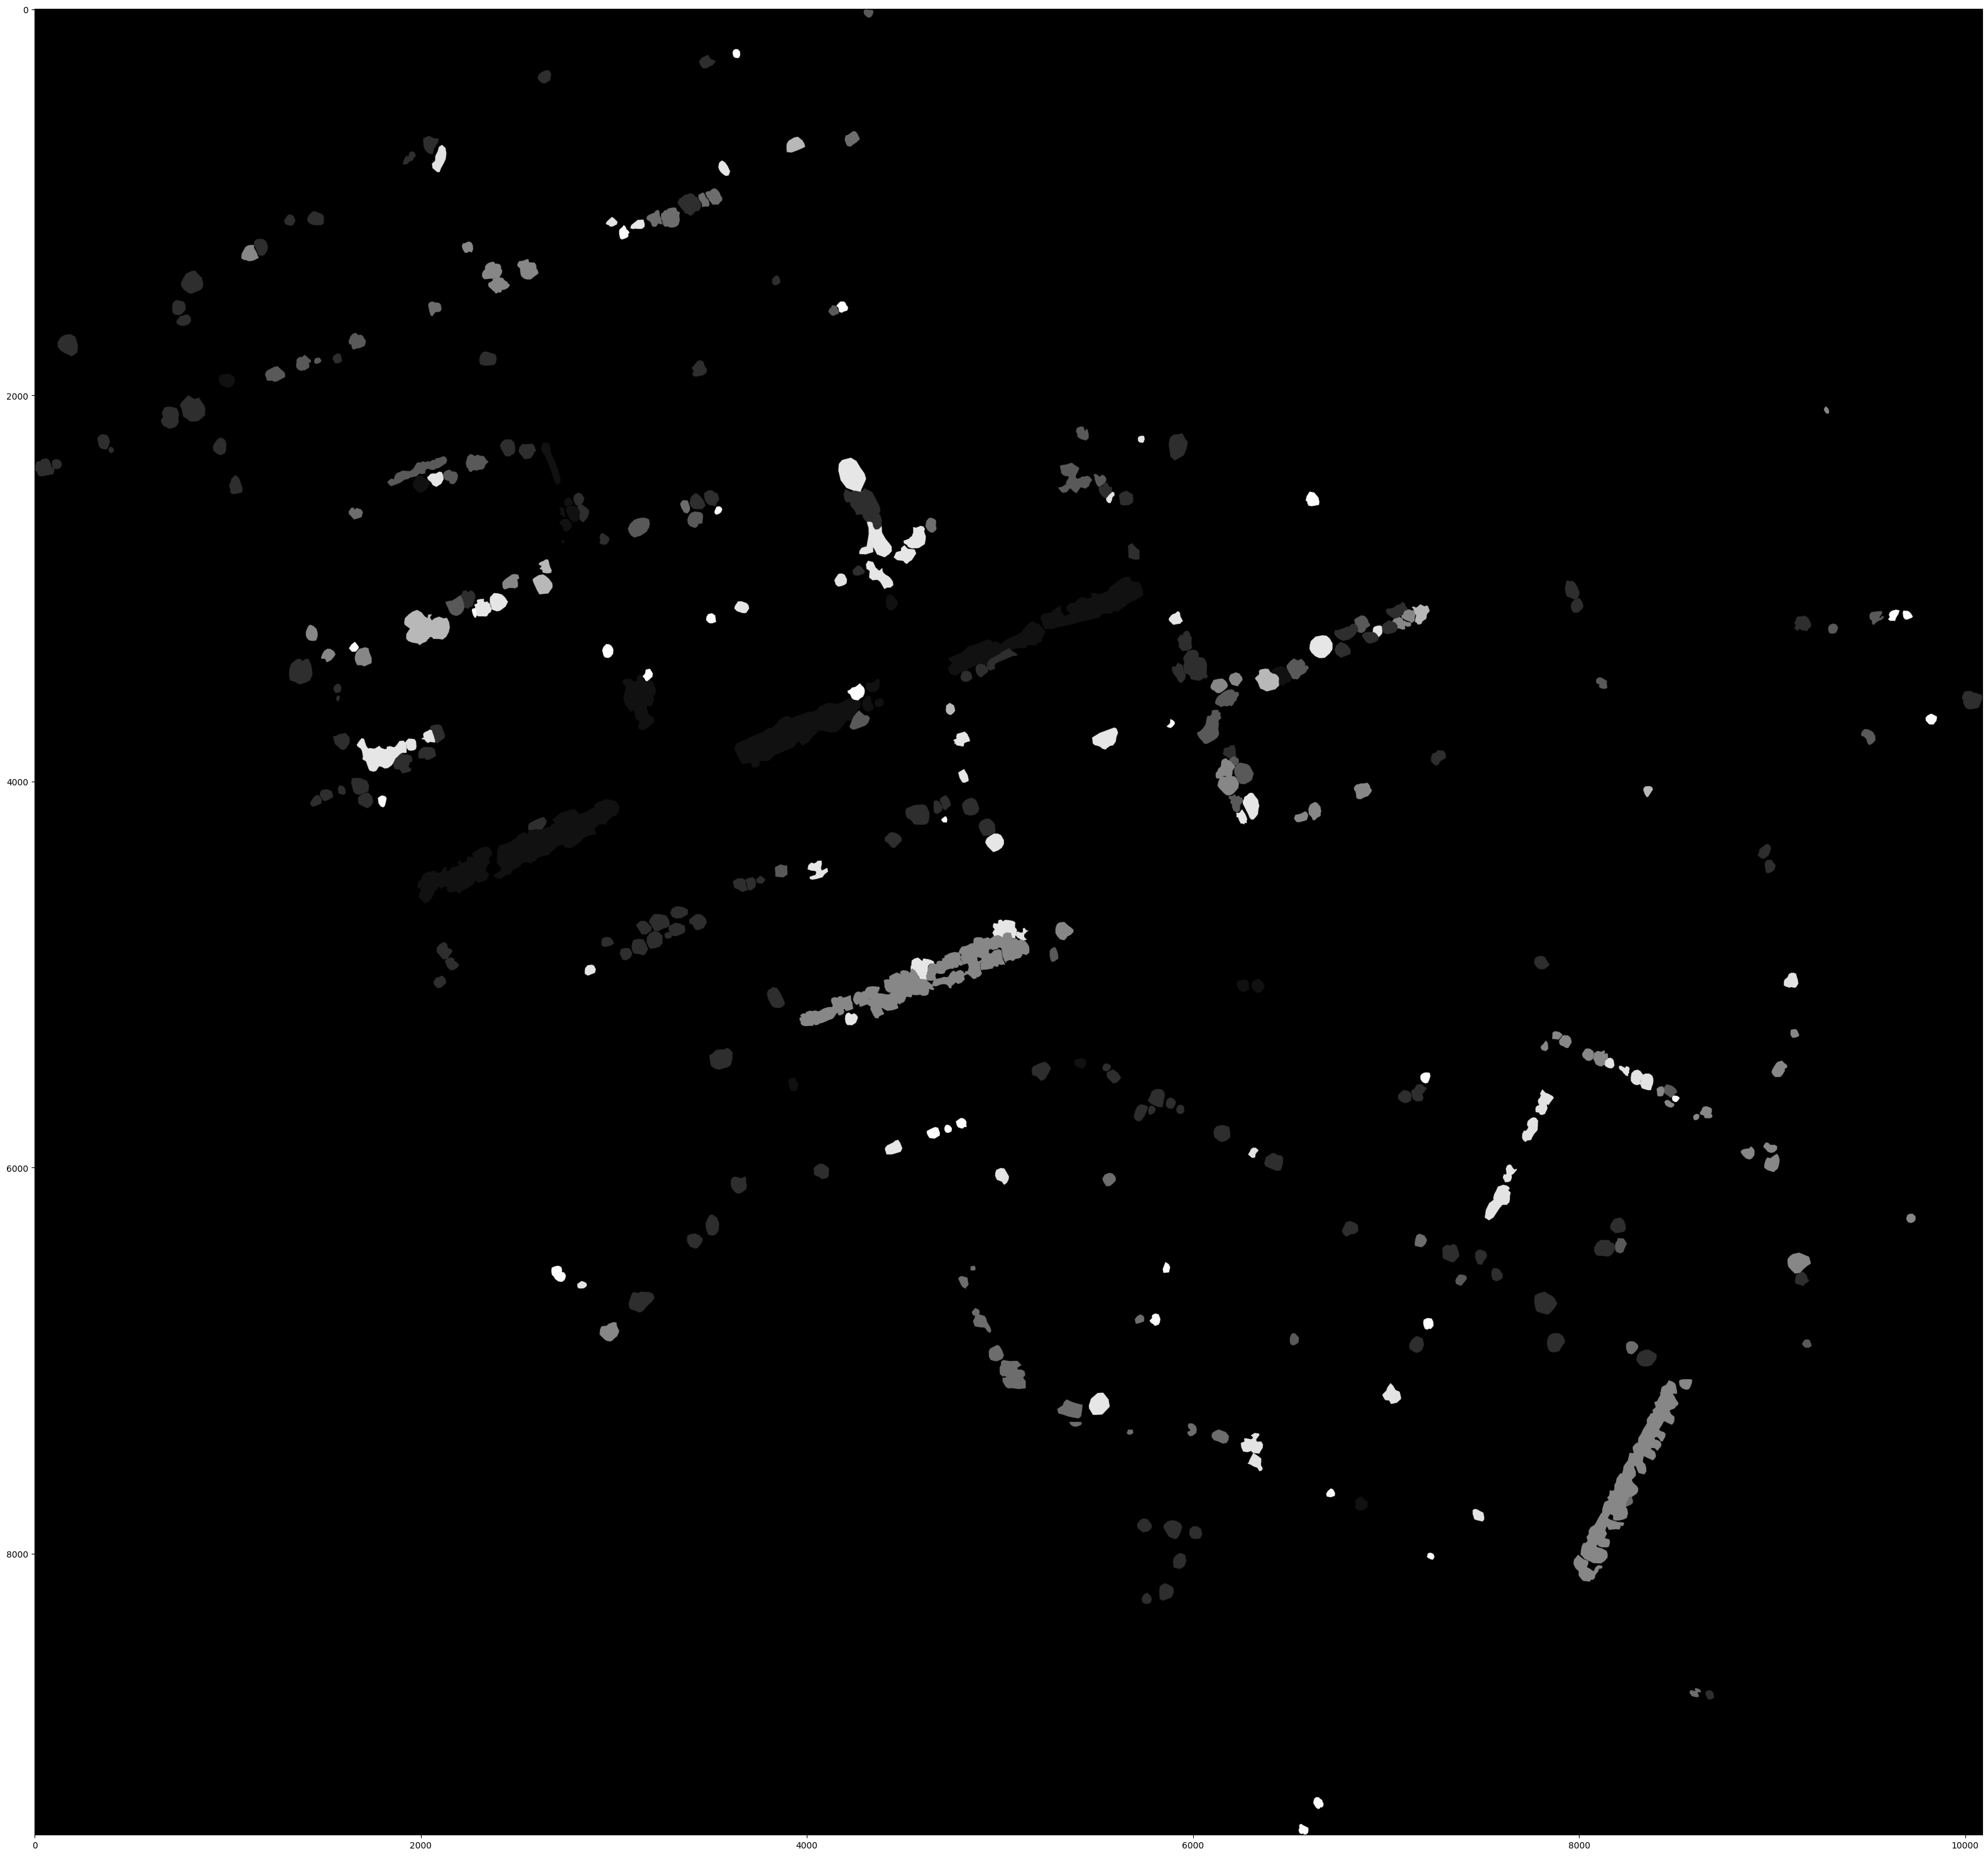

In [13]:
plt.figure(figsize=(40,40))
plt.imshow(copied_3ch,cmap='gray')

(9458, 10090)
min_x = 0
min_y = 0
max_x = -1
max_y = -1

Number of tree type 0: 118
pixelvalue of tree type 0 = 2
Total number of detected trees: 118
bounding_boxes = (238, 0, 8757, 10090)

Number of tree type 1: 8
pixelvalue of tree type 1 = 8
Total number of detected trees: 126
bounding_boxes = (663, 1914, 4083, 8383)

Number of tree type 2: 28
pixelvalue of tree type 2 = 10
Total number of detected trees: 154
bounding_boxes = (786, 1669, 7283, 6724)

Number of tree type 3: 30
pixelvalue of tree type 3 = 11
Total number of detected trees: 184
bounding_boxes = (208, 1628, 9458, 9854)

Number of tree type 4: 33
pixelvalue of tree type 4 = 15
Total number of detected trees: 217
bounding_boxes = (0, 1193, 6936, 9581)

Number of tree type 5: 38
pixelvalue of tree type 5 = 17
Total number of detected trees: 255
bounding_boxes = (1205, 1071, 8147, 9743)

Number of tree type 6: 22
pixelvalue of tree type 6 = 21
Total number of detected trees: 277
bounding_boxes = (705, 1920, 7835, 9136)

Num

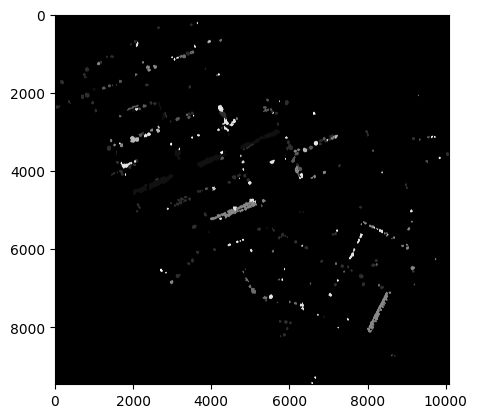

In [17]:
from osgeo import gdal
import numpy as np
import skimage
import cv2
import matplotlib.pyplot as plt

path_mask = "F:/Pedro/Facul/TCC/Dataset/ITC_CLASS.tif"
path_img = "F:/Pedro/Facul/TCC/Dataset/RGBNIR_CHM.tif"

mask_label = gdal.Open(path_mask).ReadAsArray()
print(mask_label.shape)

img_db = gdal.Open(path_img).ReadAsArray()
#print(img_db.shape)
#
# color_list = [(255, 0, 0),(0, 255, 0),(255,255, 0),(0, 0, 255),(255, 0, 255),(0,255, 255),(255,255, 255),(255,192,203)]

output = np.copy(mask_label)

values = (np.unique(output))
#print(values[1])
#print(output.shape)

img_hor_count = 0
img_ver_count = 0

#for i in range(len(values)):
#    value = values[i]
#    new[im0 == value] = i+1 
regions = skimage.measure.regionprops(mask_label.astype(int))
sum = 0
bb_list = []
#new = np.zeros((output.shape[0], output.shape[1]), dtype=np.uint8)
min_y = 0
min_x = 0
max_y = -1
max_x = -1

print(f"min_x = {min_x}")
print(f"min_y = {min_y}")
print(f"max_x = {max_x}")
print(f"max_y = {max_y}\n")

anything = mask_label[min_y:max_y,min_x:max_x]
if anything is None:
    print("ERROR")

#print(anything.shape)


copied_3ch = cv2.cvtColor(anything,cv2.COLOR_GRAY2RGB)*23

label = 0
#with open(f'F:/Pedro/YOLOv8/My_Code/datasets/full/labels/{img_hor_count}_{img_ver_count}.txt', 'w') as f:
for tree_class in regions:
    mask_class = tree_class.image[min_y:max_y,min_x:max_x]
    bounding_boxes = tree_class.bbox
    labels = skimage.measure.label(mask_class,background=0)
    tree_count = labels.max()
    sum += tree_count
    print(f"Number of tree type {label}: {labels.max()}")
    print(f"pixelvalue of tree type {label} = {tree_class.label}")
    if labels.max() > 0:
        print(f"Total number of detected trees: {sum}")
        print(f"bounding_boxes = {bounding_boxes}\n")
    
    for id in range(tree_count):
        test = np.where(labels == id+1)
        x_values = test[0]
        y_values = test[1]

        bb_class = label
        y_min = (y_values.min()+bounding_boxes[1])
        x_min = (x_values.min()+bounding_boxes[0])
        y_max = (y_values.max()+bounding_boxes[1])
        x_max = (x_values.max()+bounding_boxes[0])
        bb_list.append([y_min,x_min,y_max,x_max,bb_class])
        #copied_3ch = cv2.rectangle(copied_3ch,(y_values.min()+bounding_boxes[1],x_values.min()+bounding_boxes[0]),(y_values.max()+bounding_boxes[1],x_values.max()+bounding_boxes[0]),(0,0,255),15)
        #copied_3ch = cv2.rectangle(copied_3ch,(bounding_boxes[1],bounding_boxes[0]),(bounding_boxes[3],bounding_boxes[2]),(255,0,0),15)
        #f.write(f"{label},{x_values.min()+bounding_boxes[0]},{x_values.max()+bounding_boxes[0]},{y_values.min()+bounding_boxes[1]},{y_values.max()+bounding_boxes[1]}\n")
        #print(f"{id+1},{x_values.min()},{x_values.max()},{y_values.min()},{y_values.max()}\n")
    label += 1
print(f"sum = {sum}")
img_hor_count += 1
    
img_ver_count += 1
plt.figure()
plt.imshow(copied_3ch,cmap='gray')

In [12]:
print(bb_list)

[[3441, 238, 3529, 308, 1], [2607, 318, 2675, 385, 1], [2012, 658, 2091, 752, 1], [1906, 738, 1974, 806, 1], [3331, 955, 3451, 1071, 1], [1412, 1047, 1499, 1120, 1], [1293, 1064, 1350, 1122, 1], [1137, 1191, 1207, 1278, 1], [758, 1356, 873, 1475, 1], [3819, 1380, 3863, 1431, 1], [713, 1508, 782, 1585, 1], [734, 1584, 809, 1642, 1], [119, 1685, 224, 1799, 1], [2304, 1775, 2393, 1848, 1], [1544, 1786, 1591, 1837, 1], [3404, 1820, 3481, 1904, 1], [753, 2002, 884, 2137, 1], [654, 2060, 747, 2175, 1], [5874, 2199, 5973, 2339, 1], [325, 2203, 389, 2281, 1], [924, 2222, 993, 2311, 1], [2411, 2230, 2489, 2317, 1], [2507, 2253, 2596, 2333, 1], [382, 2269, 410, 2301, 1], [0, 2328, 140, 2420, 1], [1008, 2416, 1077, 2513, 1], [5512, 2453, 5580, 2532, 1], [4190, 2483, 4388, 2696, 1], [3467, 2493, 3545, 2574, 1], [5617, 2497, 5690, 2571, 1], [2790, 2506, 2871, 2658, 1], [3392, 2510, 3474, 2591, 1], [2926, 2716, 2978, 2774, 1], [5664, 2768, 5724, 2853, 1], [4237, 2882, 4299, 2935, 1], [7927, 2961, 80

(9457, 10089, 3)


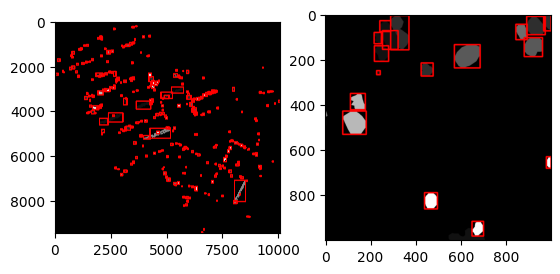

In [2]:
import albumentations as A
def show_img_with_label(img, labels, colors=(255,0,0),thickness=-1):
    if img is None:
        print("img error!")
        return
    if labels is None:
        print("labels error!")
        return
    if type(labels) is not list:
        print(f"labels must be list not {type(labels)}")
        return
    img = np.copy(img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if thickness < 1:
        if img.shape[0]>img.shape[1]:
            thickness = int(img.shape[0]*0.006)
        else:
            thickness = int(img.shape[1]*0.006)
    if len(labels) < 1:
        print("lista vazia")
        return img
    if (type(labels[0]) == list) or  (type(labels[0]) == tuple):
        multiple_labels = True
        if (type(colors[0]) == list) or  (type(colors[0]) == tuple):
            multiple_colors = True
        else:
            multiple_colors = False
    else:
        multiple_labels = False
        multiple_colors = False
    

    if multiple_labels:
        for label in labels:
            classe = int(label[4])
            point_start = (int(label[0]),int(label[1]))
            point_end = (int(label[2]),int(label[3]))
            if multiple_colors:
                color = colors[classe]
            else:
                color = colors
            img = cv2.rectangle(img, point_start, point_end, color=color, thickness=thickness)
    else:
        img = cv2.rectangle(img,(labels[0],labels[1]),(labels[2],labels[3]), color=color, thickness=thickness)
    return img

transform_random = A.Compose([
    A.RandomCrop(width=448, height=448),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.3))

transform = A.Compose([
    A.Crop(x_min=2500, y_min=2500, x_max=3500, y_max=3500)
], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.3))



print(copied_3ch.shape)
labelled_img =show_img_with_label(copied_3ch,bb_list)
transformed = transform(image=copied_3ch, bboxes=bb_list)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
cropped_img = show_img_with_label(transformed['image'],transformed['bboxes'])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(labelled_img)
axarr[1].imshow(cropped_img)

In [18]:
from tqdm.notebook import tqdm
patches_list = []
x_pos=0
for x in list_x_values:
    y_pos=0
    for y in list_y_values:
        patches_list.append((x[0],y[0],x[1],y[1],x_pos,y_pos))
        y_pos+=1
    x_pos+=1

patches_list
print(bb_list)

transform = A.Compose([
    A.Crop(x_min=0, y_min=0, x_max=0, y_max=0)
], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.3))

for patch in tqdm(patches_list):
    start_y, start_x, end_y, end_x, x_ind, y_ind = patch
    print(f"patches = (x={start_x}, y={start_y}), (x={end_x}, y=0{end_y}), x_pos = {x_ind}, y_pos = {y_ind}")
    # Update the Crop transformation parameters
    transform.transforms[0].x_min = int(start_x)
    transform.transforms[0].y_min = int(start_y)
    transform.transforms[0].x_max = int(end_x)
    transform.transforms[0].y_max = int(end_y)
    
    print(f"percentage => x={100*end_x/copied_3ch.shape[1]}%, y={100*end_y/copied_3ch.shape[0]}%)")
    # Apply the transformation to the image
    transformed = transform(image=copied_3ch, bboxes=bb_list)
    image_cropped = transformed['image']
    bounding_box_cropped = transformed['bboxes']
    print(f"bounding box cropped: {bounding_box_cropped}")
    with open(f'F:/Pedro/YOLOv8/My_Code/datasets/full/labels/{x_ind}_{y_ind}.txt', 'w') as f:
        for bb in bounding_box_cropped:
            hor_size=image_cropped.shape[1]
            ver_size=image_cropped.shape[0]
            xmin = bb[0]/ver_size
            ymin = bb[1]/hor_size
            xmax = bb[2]/ver_size
            ymax = bb[3]/hor_size
            
            width = (xmax - xmin)
            height = (ymax - ymin)
            xcenter = xmin + (width)/2
            ycenter = ymin + (height)/2
            
            f.write(f"{bb[4]} {xcenter} {ycenter} {width} {height}\n")
    if len(bounding_box_cropped)==-1:
        temp = []
        hor_size=image_cropped.shape[1]
        ver_size=image_cropped.shape[0]
        for bb in bounding_box_cropped:
            temp.append((bb[0]/hor_size,bb[1]/hor_size,bb[2]/hor_size,bb[3]/hor_size,bb[4]))
        print(f"bounding box cropped normalized: {temp}")
        break



#labelled_img = show_img_with_label(copied_3ch,bb_list)
#cropped_img = show_img_with_label(transformed['image'],transformed['bboxes'])
#f, axarr = plt.subplots(1,2)
#axarr[0].imshow(labelled_img)
#axarr[1].imshow(cropped_img)

[[3441, 238, 3529, 308, 0], [2607, 318, 2675, 385, 0], [2012, 658, 2091, 752, 0], [1906, 738, 1974, 806, 0], [3331, 955, 3451, 1071, 0], [1412, 1047, 1499, 1120, 0], [1293, 1064, 1350, 1122, 0], [1137, 1191, 1207, 1278, 0], [758, 1356, 873, 1475, 0], [3819, 1380, 3863, 1431, 0], [713, 1508, 782, 1585, 0], [734, 1584, 809, 1642, 0], [119, 1685, 224, 1799, 0], [2304, 1775, 2393, 1848, 0], [1544, 1786, 1591, 1837, 0], [3404, 1820, 3481, 1904, 0], [753, 2002, 884, 2137, 0], [654, 2060, 747, 2175, 0], [5874, 2199, 5973, 2339, 0], [325, 2203, 389, 2281, 0], [924, 2222, 993, 2311, 0], [2411, 2230, 2489, 2317, 0], [2507, 2253, 2596, 2333, 0], [382, 2269, 410, 2301, 0], [0, 2328, 140, 2420, 0], [1008, 2416, 1077, 2513, 0], [5512, 2453, 5580, 2532, 0], [4190, 2483, 4388, 2696, 0], [3467, 2493, 3545, 2574, 0], [5617, 2497, 5690, 2571, 0], [2790, 2506, 2871, 2658, 0], [3392, 2510, 3474, 2591, 0], [2926, 2716, 2978, 2774, 0], [5664, 2768, 5724, 2853, 0], [4237, 2882, 4299, 2935, 0], [7927, 2961, 80

  0%|          | 0/840 [00:00<?, ?it/s]

patches = (x=0, y=0), (x=448, y=0448), x_pos = 0, y_pos = 0
percentage => x=4.440479730399445%, y=4.737231680236862%)
bounding box cropped: []
patches = (x=336.0, y=0), (x=784.0, y=0448), x_pos = 0, y_pos = 1
percentage => x=7.770839528199029%, y=4.737231680236862%)
bounding box cropped: []
patches = (x=672.0, y=0), (x=1120.0, y=0448), x_pos = 0, y_pos = 2
percentage => x=11.101199325998612%, y=4.737231680236862%)
bounding box cropped: []
patches = (x=1008.0, y=0), (x=1456.0, y=0448), x_pos = 0, y_pos = 3
percentage => x=14.431559123798197%, y=4.737231680236862%)
bounding box cropped: []
patches = (x=1344.0, y=0), (x=1792.0, y=0448), x_pos = 0, y_pos = 4
percentage => x=17.76191892159778%, y=4.737231680236862%)
bounding box cropped: []
patches = (x=1680.0, y=0), (x=2128.0, y=0448), x_pos = 0, y_pos = 5
percentage => x=21.092278719397363%, y=4.737231680236862%)
bounding box cropped: []
patches = (x=2016.0, y=0), (x=2464.0, y=0448), x_pos = 0, y_pos = 6
percentage => x=24.422638517196948

There are 2 bounding boxes in this image.
0 ['0.27901785714285715', '0.609375', '0.19642857142857142', '0.1562499999999999']
3 ['0.6138392857142857', '0.5167410714285714', '0.0848214285714286', '0.1049107142857143']
(3, 448, 448)
uint8
uint8


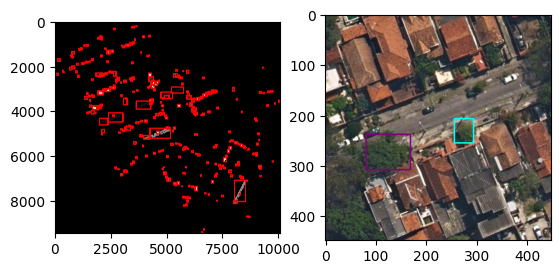

In [31]:
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from skimage import measure
import numpy as np
import rasterio
import cv2
%matplotlib inline

img_name = "0_10"

img = im0
color_list = [(128, 0, 128),(0, 0, 255),(0, 255, 0),(0, 255, 255),(255, 0, 0),(255, 0, 255),(255, 255, 0),(255, 255, 255),(0, 0, 0)]

bb_list2 = []
with open(f"F:/Pedro/YOLOv8/My_Code/datasets/full/labels/{img_name}.txt") as file:
    Lines = file.readlines()
    
    count = 0
    # Strips the newline character
    print(f"There are {len(Lines)} bounding boxes in this image.")
    color = 0
    for line in Lines:
        classe = line.strip().split()[0]
        bb = line.strip().split()[1:]
        print(classe,bb)
        ycenter = float(bb[0])
        xcenter = float(bb[1])
        height   = float(bb[2])
        width  = float(bb[3])
        xmin = xcenter - (width/2)
        ymin = ycenter - (height/2)
        xmax = xcenter + (width/2)
        ymax = ycenter + (height/2)


        bb_list2.append((ymin*448,xmin*448,ymax*448,xmax*448,classe))


#labelled_img = show_img_with_label(copied_3ch,bb_list2)

with rasterio.open(f'F:/Pedro/YOLOv8/My_Code/datasets/full/images_3ch/{img_name}.tif') as cropped_img:
    print(cropped_img.read().shape)
    cropped_img = np.swapaxes(cropped_img.read(),0,2)
    cropped_img = np.swapaxes(cropped_img,0,1)
    cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
    cropped_img = show_img_with_label(cropped_img,bb_list2, color_list)
    
f, axarr = plt.subplots(1,2)
print(labelled_img.dtype)
print(cropped_img.dtype)
axarr[0].imshow(labelled_img)
axarr[1].imshow(cropped_img)

In [16]:
from tifffile import imread, imwrite
from tqdm.notebook import tqdm
from osgeo import gdal
import numpy as np
import cv2
import rasterio
from rasterio.windows import Window


path_img = "F:/Pedro/Facul/TCC/Dataset/RGBNIR_CHM.tif"



im1 = gdal.Open(path_img).ReadAsArray()
im1 = np.swapaxes(im1,0,2)
print(im1.shape)


    
with rasterio.open(path_img) as src:
    # Read the specific window (crop) from the image
    for patch in tqdm(patches_list):
        start_y, start_x, end_y, end_x, x_ind, y_ind = patch
        start_x = int(start_x)
        start_y = int(start_y)
        end_x = int(end_x)
        end_y = int(end_y)

        print(f"patches = (x={start_x}, y={start_y}), (x={end_x}, y=0{end_y}), x_pos = {x_ind}, y_pos = {y_ind}")
        new_img = im1[start_x:end_x,start_y:end_y,:]
        width = end_x-start_x
        height = end_y-start_y

        window = Window(start_x, start_y, width, height)
        crop = src.read(window=window)
        meta = src.meta  # Preserve the metadata for later use,
        # Update the metadata with the new window dimensions
        meta['width'] = width
        meta['height'] = height
        meta['transform'] = rasterio.windows.transform(window, src.transform)
        

        # Write the cropped image to a new TIFF file
        with rasterio.open(f'F:/Pedro/YOLOv8/My_Code/datasets/full/images/{x_ind}_{y_ind}.tif', 'w', **meta) as dst:
            dst.write(crop)
        
    #imwrite(f'F:/Pedro/YOLOv8/My_Code/datasets/full/images/{x_ind}_{y_ind}.tif', new_img, planarconfig='CONTIG')
    

(10090, 9458, 5)


  0%|          | 0/840 [00:00<?, ?it/s]

patches = (x=0, y=0), (x=448, y=0448), x_pos = 0, y_pos = 0
patches = (x=336, y=0), (x=784, y=0448), x_pos = 0, y_pos = 1
patches = (x=672, y=0), (x=1120, y=0448), x_pos = 0, y_pos = 2
patches = (x=1008, y=0), (x=1456, y=0448), x_pos = 0, y_pos = 3
patches = (x=1344, y=0), (x=1792, y=0448), x_pos = 0, y_pos = 4
patches = (x=1680, y=0), (x=2128, y=0448), x_pos = 0, y_pos = 5
patches = (x=2016, y=0), (x=2464, y=0448), x_pos = 0, y_pos = 6
patches = (x=2352, y=0), (x=2800, y=0448), x_pos = 0, y_pos = 7
patches = (x=2688, y=0), (x=3136, y=0448), x_pos = 0, y_pos = 8
patches = (x=3024, y=0), (x=3472, y=0448), x_pos = 0, y_pos = 9
patches = (x=3360, y=0), (x=3808, y=0448), x_pos = 0, y_pos = 10
patches = (x=3696, y=0), (x=4144, y=0448), x_pos = 0, y_pos = 11
patches = (x=4032, y=0), (x=4480, y=0448), x_pos = 0, y_pos = 12
patches = (x=4368, y=0), (x=4816, y=0448), x_pos = 0, y_pos = 13
patches = (x=4704, y=0), (x=5152, y=0448), x_pos = 0, y_pos = 14
patches = (x=5040, y=0), (x=5488, y=0448),

In [35]:
def is_point_inside_rectangle(point_x,point_y,x_min,y_min,x_max,y_max):
    if (point_x >= x_min) and (point_x <= x_max) and (point_y >= y_min) and (point_y <= y_max):
        return True
    return False



print(is_point_inside_rectangle(10,10,0,0,100,100))

True


In [58]:
for img_id in tqdm(os.listdir("datasets/full/images/")):
    #img_id="20_20.tif"
    with rasterio.open(f"datasets/full/images/{img_id}") as src:
        print(src.read().shape)
        img_5ch = src.read()
        meta = src.meta  # Preserve the metadata for later use,
        matrix_pos = img_id[:-4].split("_")
        x_delta = int(list_x_values[int(matrix_pos[0])][1]-list_x_values[int(matrix_pos[0])][0])
        y_delta = int(list_y_values[int(matrix_pos[1])][1]-list_y_values[int(matrix_pos[1])][0])
        
        img_3ch = np.zeros((3,x_delta,y_delta), dtype=np.uint8)

        img_3ch[0] = img_5ch[0].copy() #R
        img_3ch[1] = img_5ch[1].copy() #G
        img_3ch[2] = img_5ch[2].copy() #B
        
        # count indica pro rasterio quantos canais tem a imagem, se tirar o dst.write da erro pq o 'count' original era 5
        meta['count'] = 3
        # Update the data type to uint8
        meta['dtype'] = 'uint8'
        print(img_3ch.shape)
        #"""
        img2 = np.ones((img_5ch.shape[1],img_5ch.shape[2]))

        #(4-3)/(4+3)img[3]
        img2 = ((img_5ch[3]-img_5ch[0]))/(img_5ch[3]+img_5ch[0])
        trees_pos = np.where(img2>=0.3)
        bb_list3 = []
        print(len(trees_pos[0]))
        with open(f"F:/Pedro/YOLOv8/My_Code/datasets/full/labels/{img_id[:-4]}.txt") as file:
            Lines = file.readlines()
            
            count = 0
            # Strips the newline character
            print(f"There are {len(Lines)} bounding boxes in this image.")
            color = 0
            for line in Lines:
                classe = line.strip().split()[0]
                bb = line.strip().split()[1:]
                print(classe,bb)
                ycenter = float(bb[0])
                xcenter = float(bb[1])
                height   = float(bb[2])
                width  = float(bb[3])
                xmin = xcenter - (width/2)
                ymin = ycenter - (height/2)
                xmax = xcenter + (width/2)
                ymax = ycenter + (height/2)


                bb_list3.append((xmin*x_delta,ymin*y_delta,xmax*x_delta,ymax*y_delta,classe))
            for i in range(len(trees_pos[0])):
                is_part_of_a_bb = False
                if len(bb_list3)>0:
                    for boundig_box_on_list in bb_list3:
                        xmin,ymin,xmax,ymax,classe = boundig_box_on_list
                        xmin = int(xmin)
                        ymin = int(ymin)
                        xmax = int(xmax)
                        ymax = int(ymax)

                        #img_3ch = img_3ch.transpose((1, 2, 0))
                        #img_3ch = cv2.rectangle(img_3ch.copy(),(ymin,xmin),(ymax,xmax), color=(255,0,0), thickness=3)
                        #img_3ch = img_3ch.transpose((2, 0, 1))
                        if is_point_inside_rectangle(trees_pos[0][i],trees_pos[1][i],xmin,ymin,xmax,ymax):
                            is_part_of_a_bb = True
                            break
                is_part_of_a_bb = False
                if not is_part_of_a_bb:
                    img_3ch[0][trees_pos[0][i]][trees_pos[1][i]] = 0
                    img_3ch[1][trees_pos[0][i]][trees_pos[1][i]] = 0
                    img_3ch[2][trees_pos[0][i]][trees_pos[1][i]] = 0
                #else:
                    #img_3ch[0][trees_pos[0][i]][trees_pos[1][i]] = 255
                    #img_3ch[1][trees_pos[0][i]][trees_pos[1][i]] = 255
                    #img_3ch[2][trees_pos[0][i]][trees_pos[1][i]] = 255
                    #    break
                #else:
                #    img_3ch[0][trees_pos[0][i]][trees_pos[1][i]] = 0
                #    img_3ch[1][trees_pos[0][i]][trees_pos[1][i]] = 0
                #    img_3ch[2][trees_pos[0][i]][trees_pos[1][i]] = 0
                #print(f"x={trees_pos[0][i]}, y={trees_pos[1][i]}")
            print(bb_list3)
                
        #"""

        # Write the cropped image to a new TIFF file
        with rasterio.open(f'F:/Pedro/YOLOv8/My_Code/datasets/full/images_3ch_trees_removed/{img_id}', 'w', **meta) as dst:
            dst.write(img_3ch)
        if len(bb_list3)>0:
            break


        
    
        

  0%|          | 0/840 [00:00<?, ?it/s]

(5, 448, 448)
(3, 448, 448)
47160
There are 0 bounding boxes in this image.
[]
(5, 448, 448)
(3, 448, 448)
70025
There are 0 bounding boxes in this image.
[]
(5, 448, 448)
(3, 448, 448)
24521
There are 2 bounding boxes in this image.
0 ['0.27901785714285715', '0.609375', '0.19642857142857142', '0.1562499999999999']
3 ['0.6138392857142857', '0.5167410714285714', '0.0848214285714286', '0.1049107142857143']
[(238.0, 81.00000000000001, 308.0, 169.0, '0'), (207.99999999999997, 256.0, 255.0, 294.0, '3')]


In [75]:
img_3ch.dtype

dtype('uint8')

In [20]:
import os
def delete_all_files_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                delete_all_files_in_folder(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
delete_all_files_in_folder("datasets/dataset_3ch/")

In [21]:
from random import shuffle, choice
from tqdm.notebook import tqdm
import shutil

ver_max = 0
hor_max = 0
count = 0
progbar = tqdm(os.listdir("datasets/full/images/"))
for img_id in progbar:
    lista_de_pos = img_id[:-4].strip().split("_")
    ver = int(lista_de_pos[0])
    hor = int(lista_de_pos[1])
    if ver> ver_max:
        ver_max = ver
    if hor> hor_max:
        hor_max = hor
    count += 1
print(count)

position_list = [[0,0,0],[0,0,0],[0,0,0]]
dataset_division_list = [[] for x in range(9)]
progbar = tqdm(os.listdir("datasets/full/images/"))
for img_id in progbar:
    lista_de_pos = img_id[:-4].strip().split("_")
    ver = int(lista_de_pos[0])
    hor = int(lista_de_pos[1])
    position_y = ((ver)//(1+(ver_max)//3))
    position_x = ((hor)//(1+(hor_max)//3))
    position_list[position_x-1][position_y-1] +=1
    dataset_division_list[(position_x*3)+position_y].append(img_id)
    

shuffle(dataset_division_list)

validation_set = choice(dataset_division_list)
dataset_division_list.remove(validation_set)
test_set = choice(dataset_division_list)
dataset_division_list.remove(test_set)

print(validation_set)
print(test_set)

target_path = "datasets/dataset_3ch_trees_removed/"

os.makedirs(f"{target_path}/labels/val/",exist_ok=True)
os.makedirs(f"{target_path}/images/val/",exist_ok=True)
os.makedirs(f"{target_path}/labels/test/",exist_ok=True)
os.makedirs(f"{target_path}/images/test/",exist_ok=True)
os.makedirs(f"{target_path}/labels/train/",exist_ok=True)
os.makedirs(f"{target_path}/images/train/",exist_ok=True)

delete_all_files_in_folder(target_path)

progbar = tqdm(os.listdir("datasets/full/images/"))
for img_id in progbar:
    label_id = img_id[:-4]+".txt"
    if img_id in validation_set:
        target_folder_img = target_path + "images/val/"
        target_folder_labels = target_path + "labels/val/"
    elif img_id in test_set:
        target_folder_img = target_path + "images/test/"
        target_folder_labels = target_path + "labels/test/"
    else:
        target_folder_img = target_path + "images/train/"
        target_folder_labels = target_path + "labels/train/"

    shutil.copy(f"datasets/full/images_3ch_trees_removed/{img_id}",target_folder_img + img_id)
    shutil.copy(f"datasets/full/labels/{label_id}",target_folder_labels + label_id)
    print(f"image datasets/full/images_3ch_trees_removed/{img_id} copied into {target_folder_img + img_id}")
    print(f"label datasets/full/labels/{label_id} copied into {target_folder_labels + label_id}")


  0%|          | 0/840 [00:00<?, ?it/s]

840


  0%|          | 0/840 [00:00<?, ?it/s]

['0_20.tif', '0_21.tif', '0_22.tif', '0_23.tif', '0_24.tif', '0_25.tif', '0_26.tif', '0_27.tif', '0_28.tif', '0_29.tif', '1_20.tif', '1_21.tif', '1_22.tif', '1_23.tif', '1_24.tif', '1_25.tif', '1_26.tif', '1_27.tif', '1_28.tif', '1_29.tif', '2_20.tif', '2_21.tif', '2_22.tif', '2_23.tif', '2_24.tif', '2_25.tif', '2_26.tif', '2_27.tif', '2_28.tif', '2_29.tif', '3_20.tif', '3_21.tif', '3_22.tif', '3_23.tif', '3_24.tif', '3_25.tif', '3_26.tif', '3_27.tif', '3_28.tif', '3_29.tif', '4_20.tif', '4_21.tif', '4_22.tif', '4_23.tif', '4_24.tif', '4_25.tif', '4_26.tif', '4_27.tif', '4_28.tif', '4_29.tif', '5_20.tif', '5_21.tif', '5_22.tif', '5_23.tif', '5_24.tif', '5_25.tif', '5_26.tif', '5_27.tif', '5_28.tif', '5_29.tif', '6_20.tif', '6_21.tif', '6_22.tif', '6_23.tif', '6_24.tif', '6_25.tif', '6_26.tif', '6_27.tif', '6_28.tif', '6_29.tif', '7_20.tif', '7_21.tif', '7_22.tif', '7_23.tif', '7_24.tif', '7_25.tif', '7_26.tif', '7_27.tif', '7_28.tif', '7_29.tif', '8_20.tif', '8_21.tif', '8_22.tif', '8_

  0%|          | 0/840 [00:00<?, ?it/s]

image datasets/full/images_3ch_trees_removed/0_0.tif copied into datasets/dataset_3ch_trees_removed/images/train/0_0.tif
label datasets/full/labels/0_0.txt copied into datasets/dataset_3ch_trees_removed/labels/train/0_0.txt
image datasets/full/images_3ch_trees_removed/0_1.tif copied into datasets/dataset_3ch_trees_removed/images/train/0_1.tif
label datasets/full/labels/0_1.txt copied into datasets/dataset_3ch_trees_removed/labels/train/0_1.txt
image datasets/full/images_3ch_trees_removed/0_10.tif copied into datasets/dataset_3ch_trees_removed/images/train/0_10.tif
label datasets/full/labels/0_10.txt copied into datasets/dataset_3ch_trees_removed/labels/train/0_10.txt
image datasets/full/images_3ch_trees_removed/0_11.tif copied into datasets/dataset_3ch_trees_removed/images/train/0_11.tif
label datasets/full/labels/0_11.txt copied into datasets/dataset_3ch_trees_removed/labels/train/0_11.txt
image datasets/full/images_3ch_trees_removed/0_12.tif copied into datasets/dataset_3ch_trees_rem